# Data Analysis with Seaborn

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


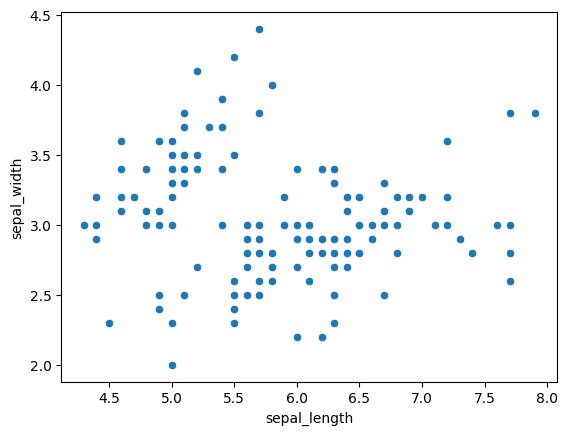

In [16]:
# Load the iris dataset
iris = sns.load_dataset('iris')
print(iris.head())

# Plot a scatter plot of sepal_length vs sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)
plt.show()

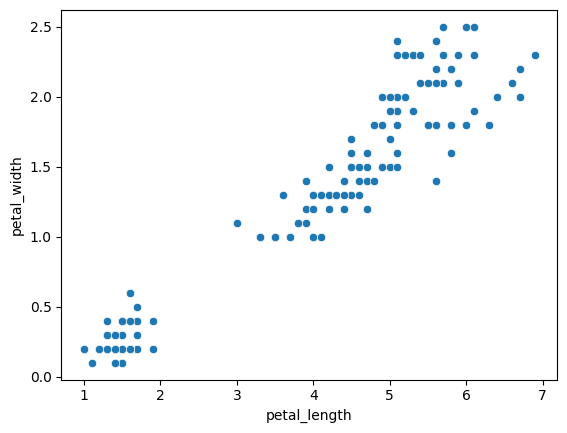

In [17]:
# what can you infer from the plot?
# The sepal width and sepal length are positively correlated

# Plot a scatter plot of petal_length vs petal_width
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.show()


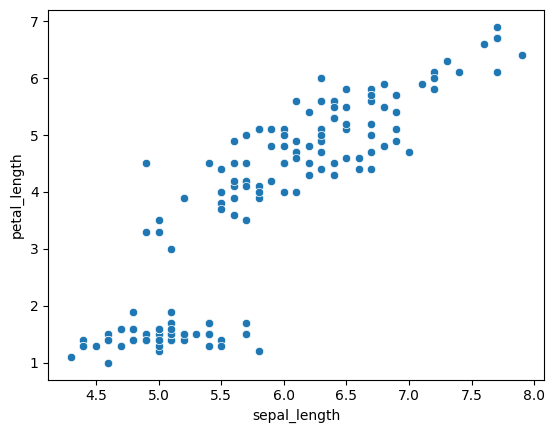

In [18]:
# what can you infer from the plot?
# The petal width and petal length are positively correlated

# Plot a scatter plot of sepal_length vs petal_length
sns.scatterplot(x='sepal_length', y='petal_length', data=iris)
plt.show()


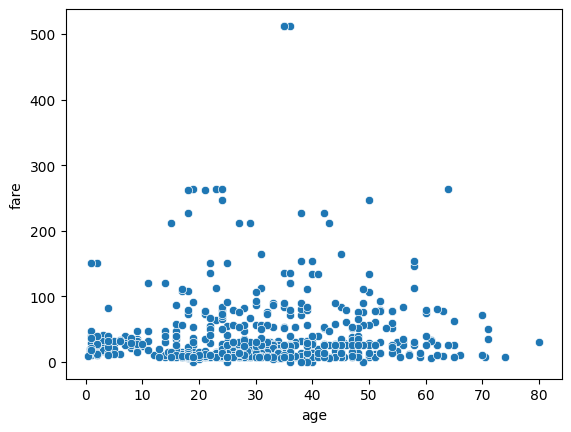

In [4]:
# draw scatter plot of age and fare
sns.scatterplot(x='age', y='fare', data=titanic)
plt.show()


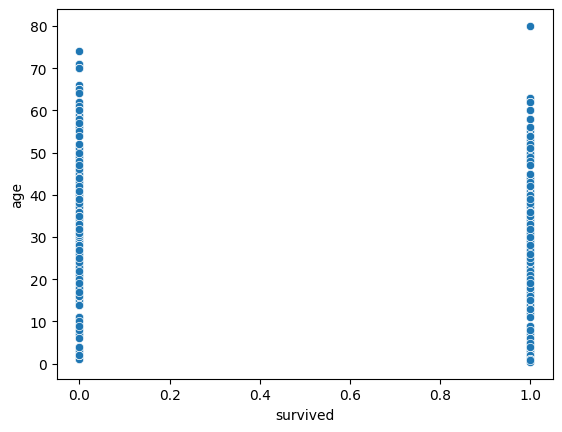

In [7]:
# draw scatter plot of age and class
sns.scatterplot(x='survived', y='age', data=titanic)
plt.show()


In [8]:
titanic

# titanic does not have a lot of numeric columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
# Load the tips dataset
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<Axes: xlabel='total_bill', ylabel='tip'>

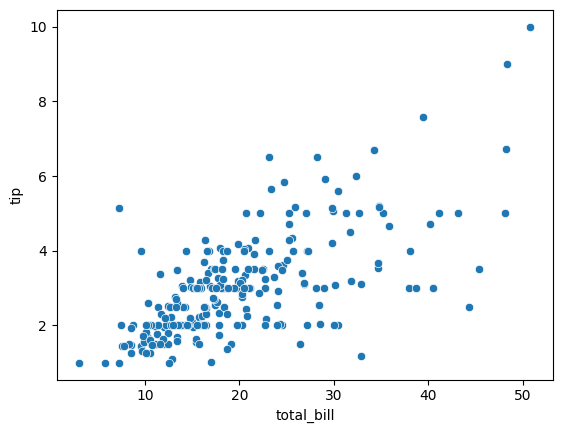

In [10]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

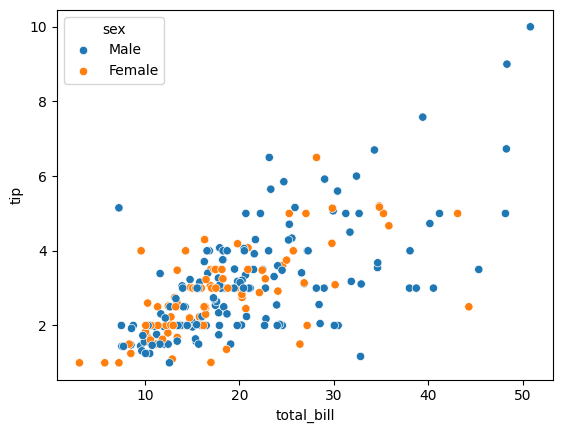

In [12]:
# add a hue to the scatter plot to show the gender
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

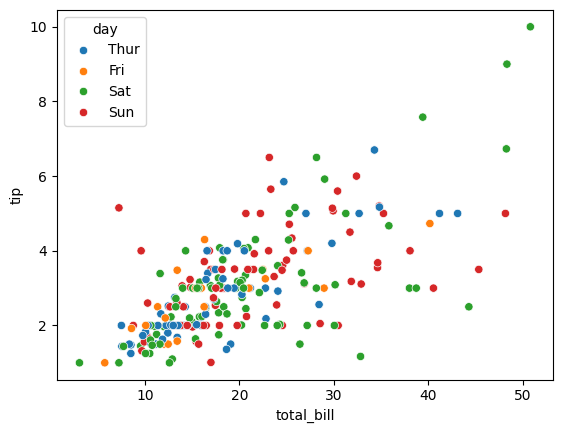

In [14]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day')

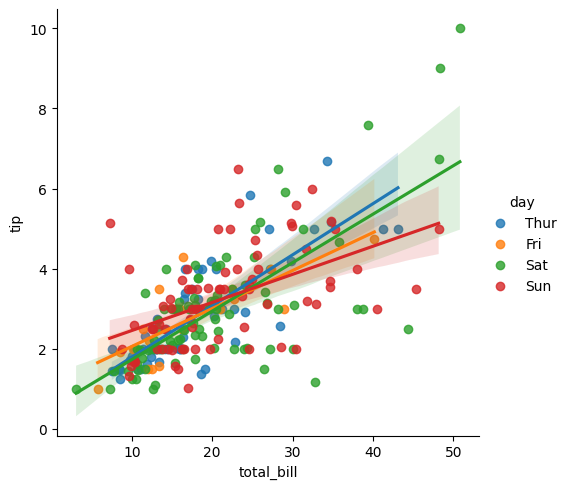

In [15]:
# add a liner regression line to the scatter plot for each day
sns.lmplot(x='total_bill', y='tip', data=tips, hue='day')


In [22]:
# use yfinance to download the stock data for Apple, Amazon, Google, Microsoft and Facebook
import yfinance as yf

apple = yf.download('AAPL', start='2019-01-01', end='2020-01-01')

apple.columns

[*********************100%***********************]  1 of 1 completed


MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [37]:

#remove the date from the index
apple_close_volume = apple
apple_close_volume.reset_index(inplace=True)
apple_close = apple_close_volume['Close']
apple_volume = apple_close_volume['Volume']
apple_close


Ticker,AAPL
0,39.480000
1,35.547501
2,37.064999
3,36.982498
4,37.687500
...,...
247,71.067497
248,72.477501
249,72.449997
250,72.879997


In [40]:
# can you please generate a scatter plot of the closing price and volume of Apple stock
sns.scatterplot(x=apple_close, y=apple_volume)


ValueError: If using all scalar values, you must pass an index

In [36]:
# scatter plot of the closing price and volume
sns.scatterplot(x=apple_close, y=apple_volume)


ValueError: If using all scalar values, you must pass an index

In [46]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the stock ticker and the time period
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Flatten the multi-level column index if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(1)

# Ensure the data is in a proper DataFrame format
stock_data = stock_data.reset_index()

# Display the first few rows of the data
print(stock_data.head())

# Check the column names to ensure they are correct
print(stock_data.columns)

# Plot the scatter plot of Close price vs Volume
sns.scatterplot(data=stock_data, x='Close', y='Volume')

# Add labels and title
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title(f'Scatter Plot of Close Price vs Volume for {ticker}')

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed

Ticker       Date       AAPL       AAPL       AAPL       AAPL       AAPL  \
0      2020-01-02  72.796005  75.087502  75.150002  73.797501  74.059998   
1      2020-01-03  72.088287  74.357498  75.144997  74.125000  74.287498   
2      2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502   
3      2020-01-07  72.320984  74.597504  75.224998  74.370003  74.959999   
4      2020-01-08  73.484322  75.797501  76.110001  74.290001  74.290001   

Ticker       AAPL  
0       135480400  
1       146322800  
2       118387200  
3       108872000  
4       132079200  
Index(['Date', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object', name='Ticker')


ValueError: Could not interpret value `Close` for `x`. An entry with this name does not appear in `data`.

[*********************100%***********************]  1 of 1 completed

Original Columns (MultiIndex):
MultiIndex([('Adj Close', 'QUBT'),
            (    'Close', 'QUBT'),
            (     'High', 'QUBT'),
            (      'Low', 'QUBT'),
            (     'Open', 'QUBT'),
            (   'Volume', 'QUBT')],
           names=['Price', 'Ticker'])
Cleaned DataFrame:
        Date  Adj Close  Close  High    Low   Open  Volume
0 2020-01-02      2.950  2.950  2.95  2.950  2.950     200
1 2020-01-03      2.950  2.950  2.95  2.950  2.950       0
2 2020-01-06      2.950  2.950  2.95  2.950  2.950       0
3 2020-01-07      3.100  3.100  3.25  3.100  3.195    3000
4 2020-01-08      2.975  2.975  3.00  2.975  3.000    1000


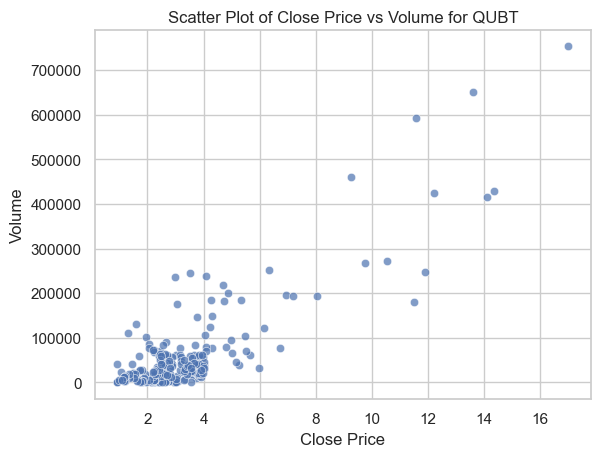

In [63]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the stock ticker and the time period
ticker = 'QUBT'
start_date = '2020-01-01'
end_date = '2021-01-01'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Debug: Print the original columns
print("Original Columns (MultiIndex):")
print(stock_data.columns)

# Flatten the MultiIndex columns
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

# Debug: Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(stock_data.head())

# Check for necessary columns
required_columns = ['Close', 'Volume']
missing_columns = [col for col in required_columns if col not in stock_data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}. Cannot plot data.")
else:
    # Drop missing values
    stock_data.dropna(subset=['Close', 'Volume'], inplace=True)

    # Scatter plot
    sns.set_theme(style="whitegrid")
    sns.scatterplot(data=stock_data, x='Close', y='Volume', alpha=0.7)

    # Add labels and title
    plt.xlabel('Close Price')
    plt.ylabel('Volume')
    plt.title(f'Scatter Plot of Close Price vs Volume for {ticker}')

    # Show the plot
    plt.show()


In [53]:
stock_data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.796005,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.662704,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.484322,75.797501,76.110001,74.290001,74.290001,132079200


[*********************100%***********************]  1 of 1 completed

Days with volume spikes and stable price:
Empty DataFrame
Columns: [Date, Close, Volume]
Index: []


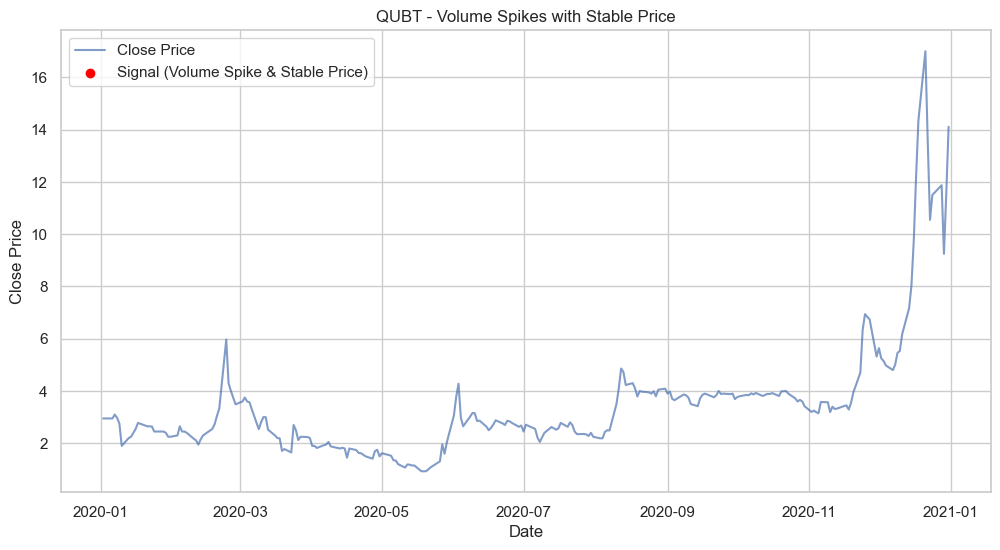

In [68]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock ticker and the time period
ticker = 'QUBT'
start_date = '2020-01-01'
end_date = '2021-01-01'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Flatten the MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

# Calculate volume spike
stock_data['Volume_Spike'] = (stock_data['Volume'] / stock_data['Volume'].shift(1)) > 10

# Calculate price stability
stock_data['Price_Unchanged'] = (
    (stock_data['Close'] - stock_data['Close'].shift(1)).abs() <= (0.01 * stock_data['Close'].shift(1))
)

# Combine conditions
stock_data['Signal'] = stock_data['Volume_Spike'] & stock_data['Price_Unchanged']

# Display signal days
signal_days = stock_data[stock_data['Signal']]
print("Days with volume spikes and stable price:")
print(signal_days[['Date', 'Close', 'Volume']])

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', alpha=0.7)
plt.scatter(signal_days['Date'], signal_days['Close'], color='red', label='Signal (Volume Spike & Stable Price)', zorder=5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f"{ticker} - Volume Spikes with Stable Price")
plt.legend()
plt.show()


In [ ]:
stock_data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.796005,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.662704,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.484322,75.797501,76.110001,74.290001,74.290001,132079200


[*********************100%***********************]  1 of 1 completed


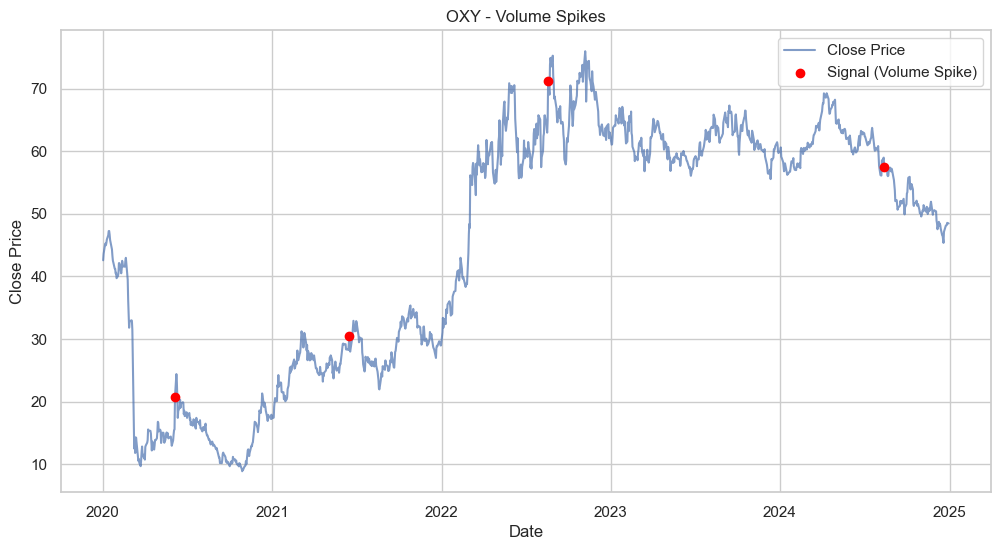

In [81]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock ticker and the time period
ticker = 'OXY'
start_date = '2020-01-01'
end_date = '2024-12-31'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Flatten the MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

# Calculate volume spike
stock_data['Volume_Spike'] = (stock_data['Volume'] / stock_data['Volume'].shift(1)) > 3

# Display signal days
signal_days = stock_data[stock_data['Volume_Spike']]

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', alpha=0.7)
plt.scatter(signal_days['Date'], signal_days['Close'], color='red', label='Signal (Volume Spike)', zorder=5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f"{ticker} - Volume Spikes")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


Days with volume spikes:
Empty DataFrame
Columns: [Date, Close, Volume, ATR]
Index: []


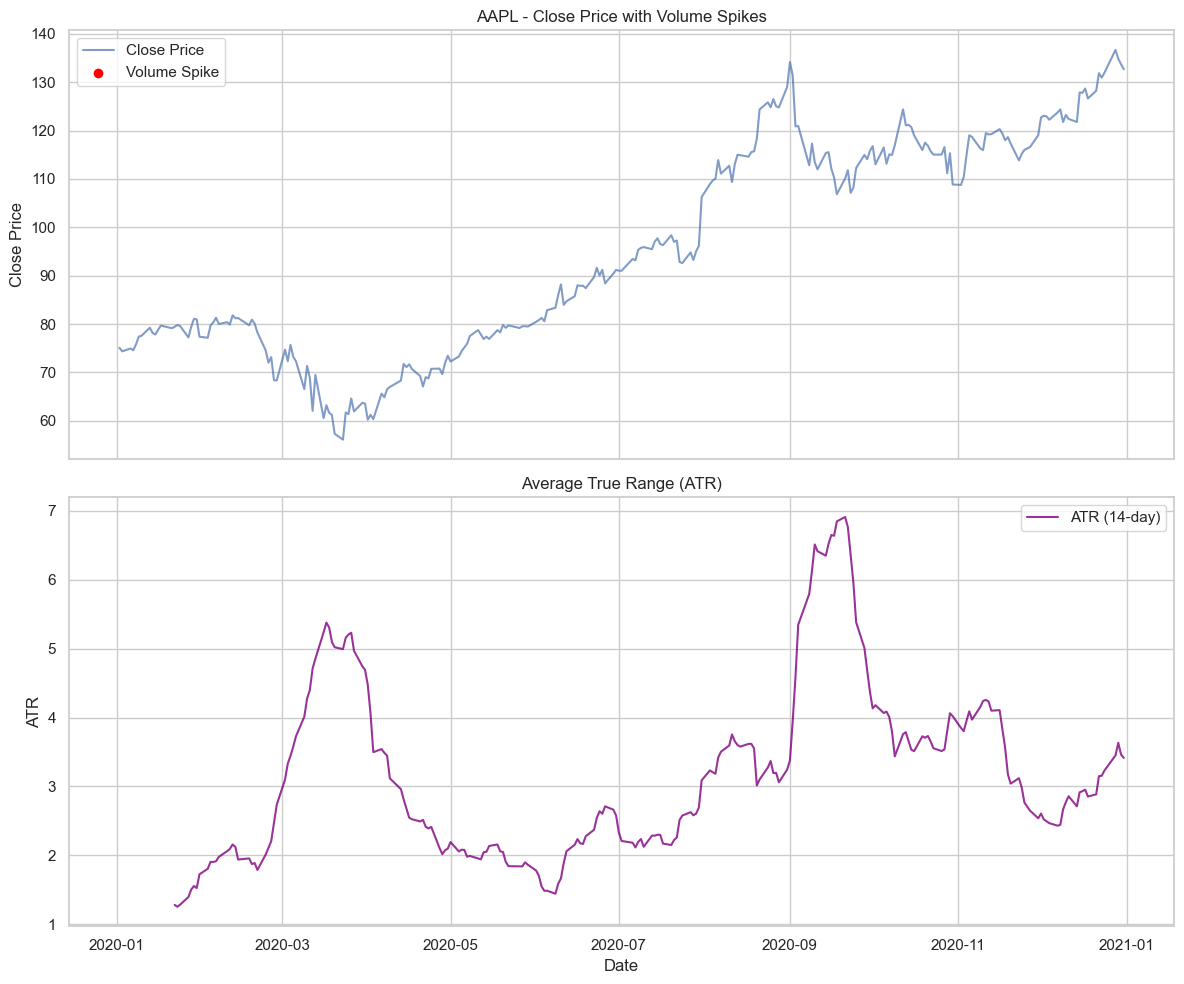

In [82]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock ticker and the time period
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Flatten the MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

# Calculate ATR (14-day period)
high_low = stock_data['High'] - stock_data['Low']
high_close = np.abs(stock_data['High'] - stock_data['Close'].shift(1))
low_close = np.abs(stock_data['Low'] - stock_data['Close'].shift(1))

# True Range (TR)
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
stock_data['ATR'] = true_range.rolling(window=14).mean()

# Calculate volume spike
stock_data['Volume_Spike'] = (stock_data['Volume'] / stock_data['Volume'].shift(1)) > 10

# Display signal days
signal_days = stock_data[stock_data['Volume_Spike']]
print("Days with volume spikes:")
print(signal_days[['Date', 'Close', 'Volume', 'ATR']])

# Plotting
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Close Price with Volume Spike Signals
ax[0].plot(stock_data['Date'], stock_data['Close'], label='Close Price', alpha=0.7)
ax[0].scatter(signal_days['Date'], signal_days['Close'], color='red', label='Volume Spike', zorder=5)
ax[0].set_ylabel('Close Price')
ax[0].set_title(f"{ticker} - Close Price with Volume Spikes")
ax[0].legend()

# Plot ATR
ax[1].plot(stock_data['Date'], stock_data['ATR'], label='ATR (14-day)', color='purple', alpha=0.8)
ax[1].set_ylabel('ATR')
ax[1].set_title('Average True Range (ATR)')
ax[1].legend()

# Final adjustments
plt.xlabel('Date')
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Days with volume spikes:
          Date       Close    Volume       ATR
40  2024-02-29  413.640015  31947300  6.500711
79  2024-04-25  399.040009  40586500  8.232862
140 2024-07-24  428.899994  26805800  8.811434
144 2024-07-30  422.920013  32687600  9.777860
181 2024-09-20  435.269989  55167100  8.546426
245 2024-12-20  436.600006  64263700  8.138572
249 2024-12-27  430.529999  18117700  8.158569


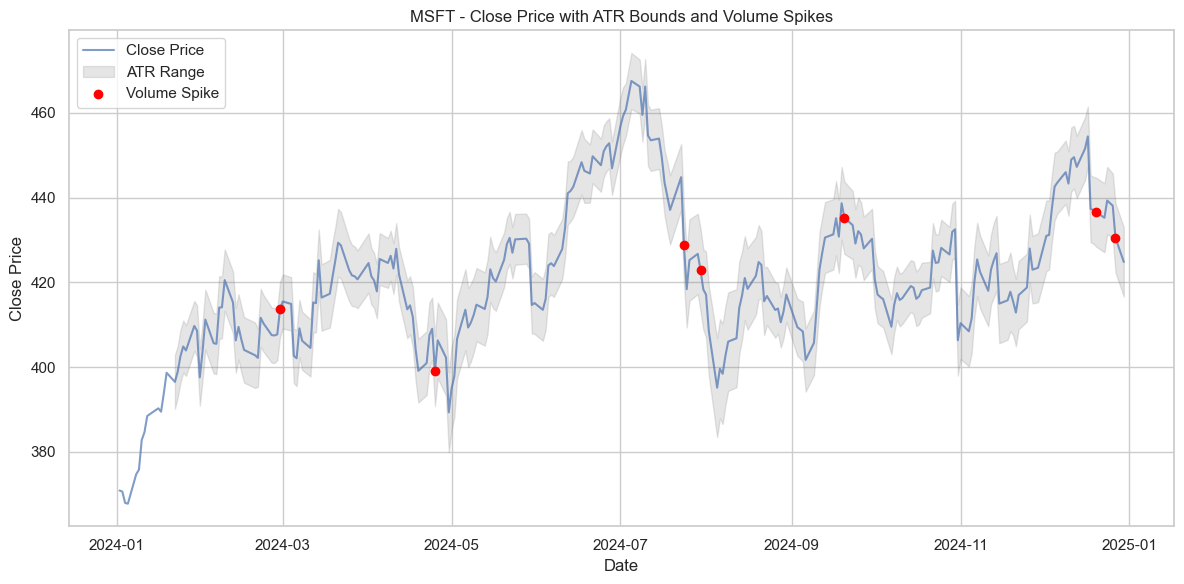

In [87]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock ticker and the time period
ticker = 'MSFT'
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Flatten the MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

# Calculate ATR (14-day period)
high_low = stock_data['High'] - stock_data['Low']
high_close = np.abs(stock_data['High'] - stock_data['Close'].shift(1))
low_close = np.abs(stock_data['Low'] - stock_data['Close'].shift(1))

# True Range (TR)
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
stock_data['ATR'] = true_range.rolling(window=14).mean()

# Calculate upper and lower bounds
stock_data['ATR_Upper'] = stock_data['Close'] + stock_data['ATR']
stock_data['ATR_Lower'] = stock_data['Close'] - stock_data['ATR']

# Calculate volume spike
stock_data['Volume_Spike'] = (stock_data['Volume'] / stock_data['Volume'].shift(1)) > 2

# Display signal days
signal_days = stock_data[stock_data['Volume_Spike']]
print("Days with volume spikes:")
print(signal_days[['Date', 'Close', 'Volume', 'ATR']])

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot Close Price
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', alpha=0.7)

# Plot ATR bounds as shaded areas
plt.fill_between(
    stock_data['Date'], 
    stock_data['ATR_Lower'], 
    stock_data['ATR_Upper'], 
    color='gray', alpha=0.2, label='ATR Range'
)

# Plot Volume Spike Signals
plt.scatter(signal_days['Date'], signal_days['Close'], color='red', label='Volume Spike', zorder=5)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f"{ticker} - Close Price with ATR Bounds and Volume Spikes")
plt.legend()
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Accumulation Phase Days:
          Date      Close    Volume  Price_StdDev
118 2024-06-21  60.919998  21295000      0.759363
185 2024-09-26  49.910000  22350700      0.700961
187 2024-09-30  51.540001  20308800      0.680647
219 2024-11-13  51.119999  24172200      0.566414
233 2024-12-04  48.900002  14729200      0.723535


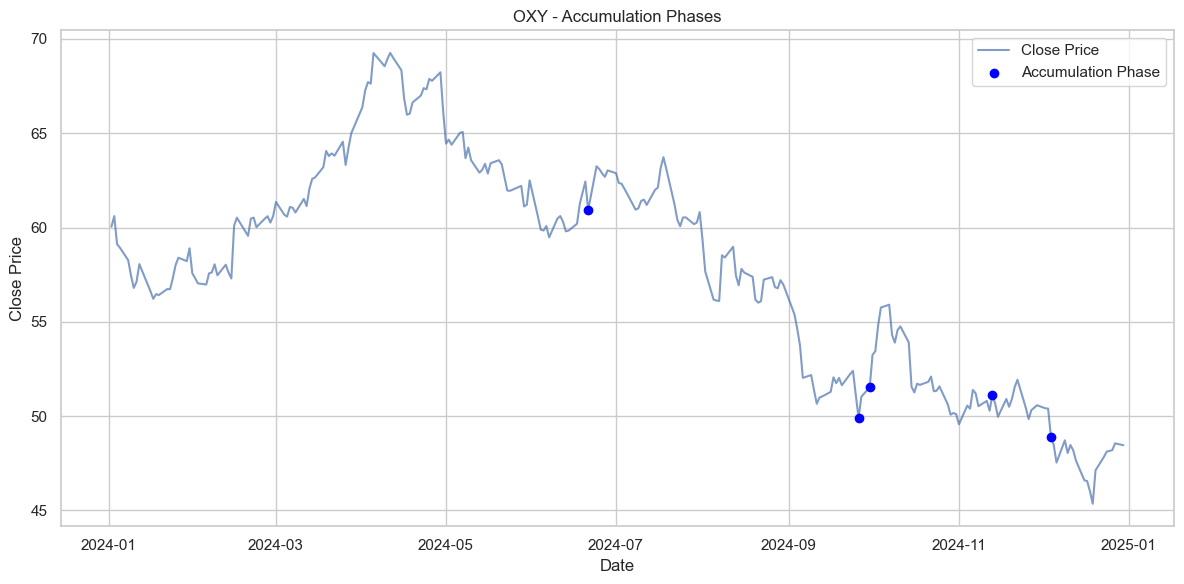

In [96]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock ticker and the time period
ticker = 'OXY'
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fetch the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Flatten the MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

# Calculate rolling statistics
window = 14  # Define rolling window size
stock_data['Price_StdDev'] = stock_data['Close'].rolling(window).std()
stock_data['Volume_Avg'] = stock_data['Volume'].rolling(window).mean()

# Define thresholds for accumulation
low_volatility_threshold = stock_data['Price_StdDev'].quantile(0.2)  # Bottom 20% volatility
high_volume_threshold = stock_data['Volume_Avg'] * 1.5  # 1.5x average volume

# Identify accumulation phase
stock_data['Accumulation_Phase'] = (
    (stock_data['Price_StdDev'] <= low_volatility_threshold) & 
    (stock_data['Volume'] > high_volume_threshold)
)

# Display days in the accumulation phase
accumulation_days = stock_data[stock_data['Accumulation_Phase']]
print("Accumulation Phase Days:")
print(accumulation_days[['Date', 'Close', 'Volume', 'Price_StdDev']])

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot Close Price
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', alpha=0.7)

# Highlight Accumulation Phases
plt.scatter(accumulation_days['Date'], accumulation_days['Close'], color='blue', label='Accumulation Phase', zorder=5)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f"{ticker} - Accumulation Phases")
plt.legend()
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Accumulation Phase Days:
Empty DataFrame
Columns: [Date, Close, Volume, ATR_Percentage, RVOL]
Index: []


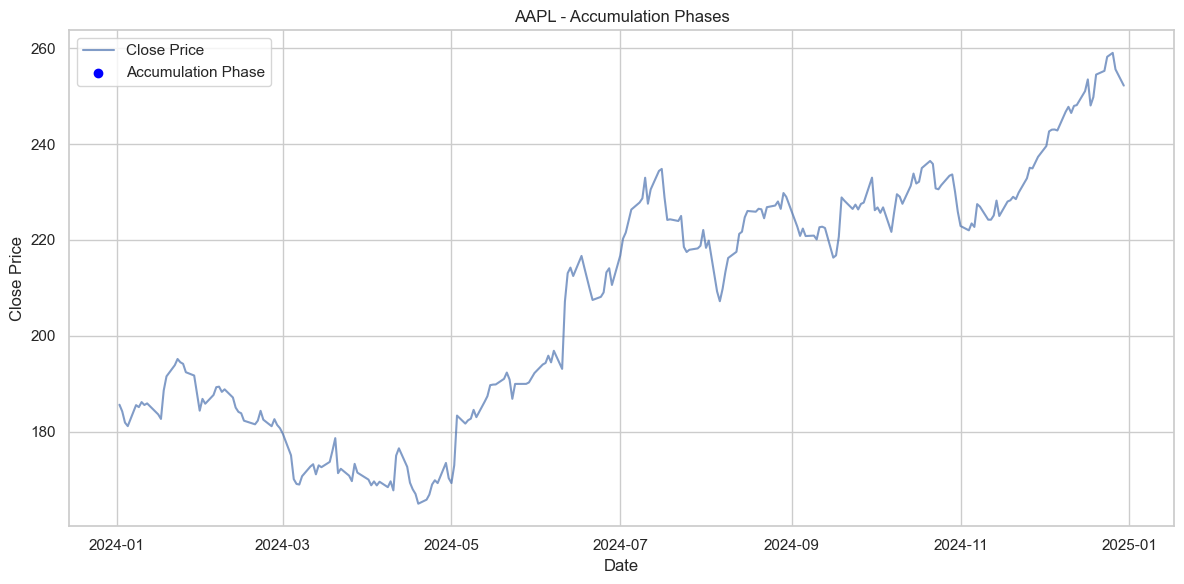

In [98]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetch stock data for the given ticker and date range.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Flatten MultiIndex columns if necessary
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

    # Reset the index for consistency
    stock_data.reset_index(inplace=True)
    return stock_data

def calculate_accumulation_phases(data, window=14, rvol_threshold=1.25, atr_percentage_threshold=0.01):
    """
    Enhanced accumulation phase detection algorithm using percentage-based ATR threshold.
    """
    # Calculate rolling averages and metrics
    data['Volume_Avg'] = data['Volume'].rolling(window).mean()
    data['Price_Range'] = data['High'] - data['Low']
    data['ATR'] = data['Price_Range'].rolling(window).mean()
    data['RVOL'] = data['Volume'] / data['Volume_Avg']
    data['ATR_Percentage'] = (data['ATR'] / data['Close']) * 100  # ATR as a percentage of Close

    # Define conditions for accumulation phase
    high_rvol = data['RVOL'] >= rvol_threshold  # High relative volume
    low_atr_percentage = data['ATR_Percentage'] <= atr_percentage_threshold * 100  # Low price movement as a percentage

    # Mark accumulation phases
    data['Accumulation_Phase'] = high_rvol & low_atr_percentage

    # Filter data for accumulation days
    accumulation_data = data[data['Accumulation_Phase']]
    return data, accumulation_data

def plot_accumulation_phases(data, accumulation_data, ticker):
    """
    Plot accumulation phases with highlighted points on the price chart.
    """
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Plot Close Price
    plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.7)

    # Highlight Accumulation Phases
    plt.scatter(accumulation_data['Date'], accumulation_data['Close'], color='blue', label='Accumulation Phase', zorder=5)

    # Labels and title
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f"{ticker} - Accumulation Phases")
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Define the stock ticker and the time period
    ticker = 'AAPL'
    start_date = '2024-01-01'
    end_date = '2024-12-31'

    # Fetch the stock data
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Calculate accumulation phases
    stock_data, accumulation_days = calculate_accumulation_phases(stock_data)

    # Display accumulation phase days
    print("Accumulation Phase Days:")
    print(accumulation_days[['Date', 'Close', 'Volume', 'ATR_Percentage', 'RVOL']])

    # Plot the results
    plot_accumulation_phases(stock_data, accumulation_days, ticker)

if __name__ == "__main__":
    main()


In [99]:
def identify_entry_exit_points(data):
    """
    Identify entry and exit points based on accumulation phases.
    """
    # Identify resistance during accumulation
    data['Resistance'] = data['High'].rolling(14).max()  # High during the accumulation phase

    # Entry: Breakout above resistance with volume spike
    data['Entry_Signal'] = (
        (data['Close'] > data['Resistance']) & 
        (data['Volume'] > data['Volume_Avg'] * 1.5)  # Volume spike
    )

    # Calculate profit target (1x accumulation range)
    data['Accumulation_Range'] = data['Resistance'] - data['Low']
    data['Profit_Target'] = data['Resistance'] + data['Accumulation_Range']

    # Exit: Trailing stop below 20-day SMA
    data['SMA_20'] = data['Close'].rolling(20).mean()
    data['Exit_Signal'] = data['Close'] < data['SMA_20']

    return data

# Example usage
stock_data, accumulation_days = calculate_accumulation_phases(stock_data)
stock_data = identify_entry_exit_points(stock_data)

# Display entry and exit signals
print(stock_data[['Date', 'Close', 'Resistance', 'Profit_Target', 'Entry_Signal', 'Exit_Signal']])


          Date      Close  Resistance  Profit_Target  Entry_Signal  \
0   2024-01-02  60.049999         NaN            NaN         False   
1   2024-01-03  60.610001         NaN            NaN         False   
2   2024-01-04  59.119999         NaN            NaN         False   
3   2024-01-05  58.939999         NaN            NaN         False   
4   2024-01-08  58.270000         NaN            NaN         False   
..         ...        ...         ...            ...           ...   
246 2024-12-23  47.840000   50.419998      54.039997         False   
247 2024-12-24  48.119999   49.200001      51.110001         False   
248 2024-12-26  48.200001   49.150002      50.810001         False   
249 2024-12-27  48.560001   49.150002      50.270004         False   
250 2024-12-30  48.459999   49.049999      49.789997         False   

     Exit_Signal  
0          False  
1          False  
2          False  
3          False  
4          False  
..           ...  
246         True  
247    

[*********************100%***********************]  1 of 1 completed

Trading Signals:
          Date       Close  Resistance  Profit_Target  Entry_Signal  \
0   2024-01-02  185.639999         NaN            NaN         False   
1   2024-01-03  184.250000         NaN            NaN         False   
2   2024-01-04  181.910004         NaN            NaN         False   
3   2024-01-05  181.179993         NaN            NaN         False   
4   2024-01-08  185.559998         NaN            NaN         False   
..         ...         ...         ...            ...           ...   
246 2024-12-23  255.270004  255.649994     257.849991         False   
247 2024-12-24  258.200012  258.209991     261.129990         False   
248 2024-12-26  259.019989  260.100006     262.570007         False   
249 2024-12-27  255.589996  260.100006     267.140015         False   
250 2024-12-30  252.199997  260.100006     269.450012         False   

     Exit_Signal  
0          False  
1          False  
2          False  
3          False  
4          False  
..           ...

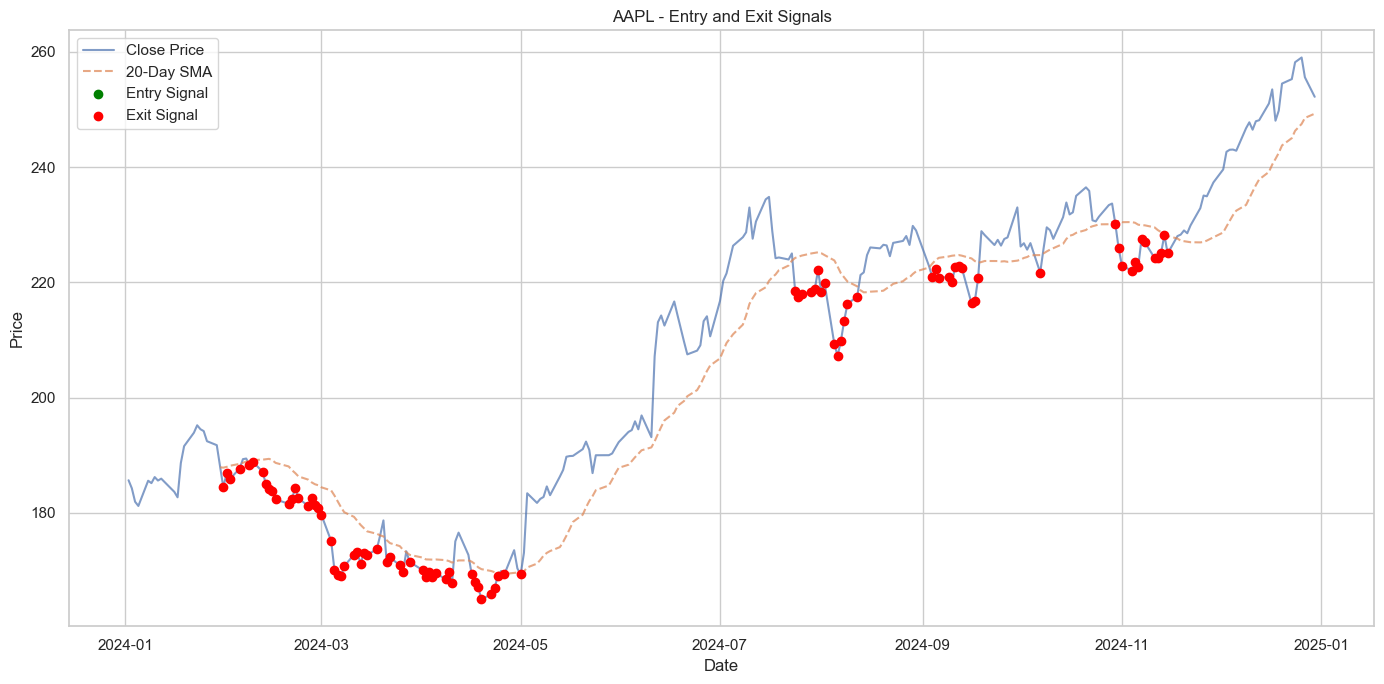

In [101]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetch stock data for the given ticker and date range.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Flatten MultiIndex columns if necessary
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

    # Reset the index for consistency
    stock_data.reset_index(inplace=True)
    return stock_data

def calculate_accumulation_phases(data, window=14, rvol_threshold=1.25, atr_percentage_threshold=0.01):
    """
    Enhanced accumulation phase detection algorithm using percentage-based ATR threshold.
    """
    # Calculate rolling averages and metrics
    data['Volume_Avg'] = data['Volume'].rolling(window).mean()
    data['Price_Range'] = data['High'] - data['Low']
    data['ATR'] = data['Price_Range'].rolling(window).mean()
    data['RVOL'] = data['Volume'] / data['Volume_Avg']
    data['ATR_Percentage'] = (data['ATR'] / data['Close']) * 100  # ATR as a percentage of Close

    # Define conditions for accumulation phase
    high_rvol = data['RVOL'] >= rvol_threshold  # High relative volume
    low_atr_percentage = data['ATR_Percentage'] <= atr_percentage_threshold * 100  # Low price movement as a percentage

    # Mark accumulation phases
    data['Accumulation_Phase'] = high_rvol & low_atr_percentage

    # Filter data for accumulation days
    accumulation_data = data[data['Accumulation_Phase']]
    return data, accumulation_data

def identify_entry_exit_points(data):
    """
    Identify entry and exit points based on accumulation phases.
    """
    # Identify resistance during accumulation
    data['Resistance'] = data['High'].rolling(14).max()  # High during the accumulation phase

    # Entry: Breakout above resistance with volume spike
    data['Entry_Signal'] = (
        (data['Close'] > data['Resistance']) & 
        (data['Volume'] > data['Volume_Avg'] * 1.5)  # Volume spike
    )

    # Calculate profit target (1x accumulation range)
    data['Accumulation_Range'] = data['Resistance'] - data['Low']
    data['Profit_Target'] = data['Resistance'] + data['Accumulation_Range']

    # Exit: Trailing stop below 20-day SMA
    data['SMA_20'] = data['Close'].rolling(20).mean()
    data['Exit_Signal'] = data['Close'] < data['SMA_20']

    return data

def plot_trading_signals(data, ticker):
    """
    Plot price chart with entry and exit signals.
    """
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.7)
    plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', linestyle='--', alpha=0.7)

    # Highlight entry signals
    plt.scatter(data[data['Entry_Signal']]['Date'], 
                data[data['Entry_Signal']]['Close'], 
                color='green', label='Entry Signal', zorder=5)

    # Highlight exit signals
    plt.scatter(data[data['Exit_Signal']]['Date'], 
                data[data['Exit_Signal']]['Close'], 
                color='red', label='Exit Signal', zorder=5)

    # Add profit targets as horizontal lines
    for _, row in data[data['Entry_Signal']].iterrows():
        plt.axhline(y=row['Profit_Target'], color='blue', linestyle='--', alpha=0.5, label='Profit Target')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f"{ticker} - Entry and Exit Signals")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Define the stock ticker and the time period
    ticker = 'AAPL'
    start_date = '2024-01-01'
    end_date = '2024-12-31'

    # Fetch the stock data
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Calculate accumulation phases
    stock_data, accumulation_days = calculate_accumulation_phases(stock_data)

    # Identify entry and exit points
    stock_data = identify_entry_exit_points(stock_data)

    # Display signals
    print("Trading Signals:")
    print(stock_data[['Date', 'Close', 'Resistance', 'Profit_Target', 'Entry_Signal', 'Exit_Signal']])

    # Plot the results
    plot_trading_signals(stock_data, ticker)

if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed


Remaining rows after dropna: index         0
Date          0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
50_SMA        0
Std_Dev       0
Upper_Band    0
Lower_Band    0
dtype: int64
Trade Signals:
          Date       Close  Entry_Signal  Exit_Signal
61  2023-03-31  164.899994          True        False
62  2023-04-03  166.169998          True        False
63  2023-04-04  165.630005          True        False
103 2023-06-01  180.089996          True        False
104 2023-06-02  180.949997          True        False
..         ...         ...           ...          ...
492 2024-12-17  253.479996          True        False
495 2024-12-20  254.490005          True        False
496 2024-12-23  255.270004          True        False
497 2024-12-24  258.200012          True        False
498 2024-12-26  259.019989          True        False

[213 rows x 4 columns]


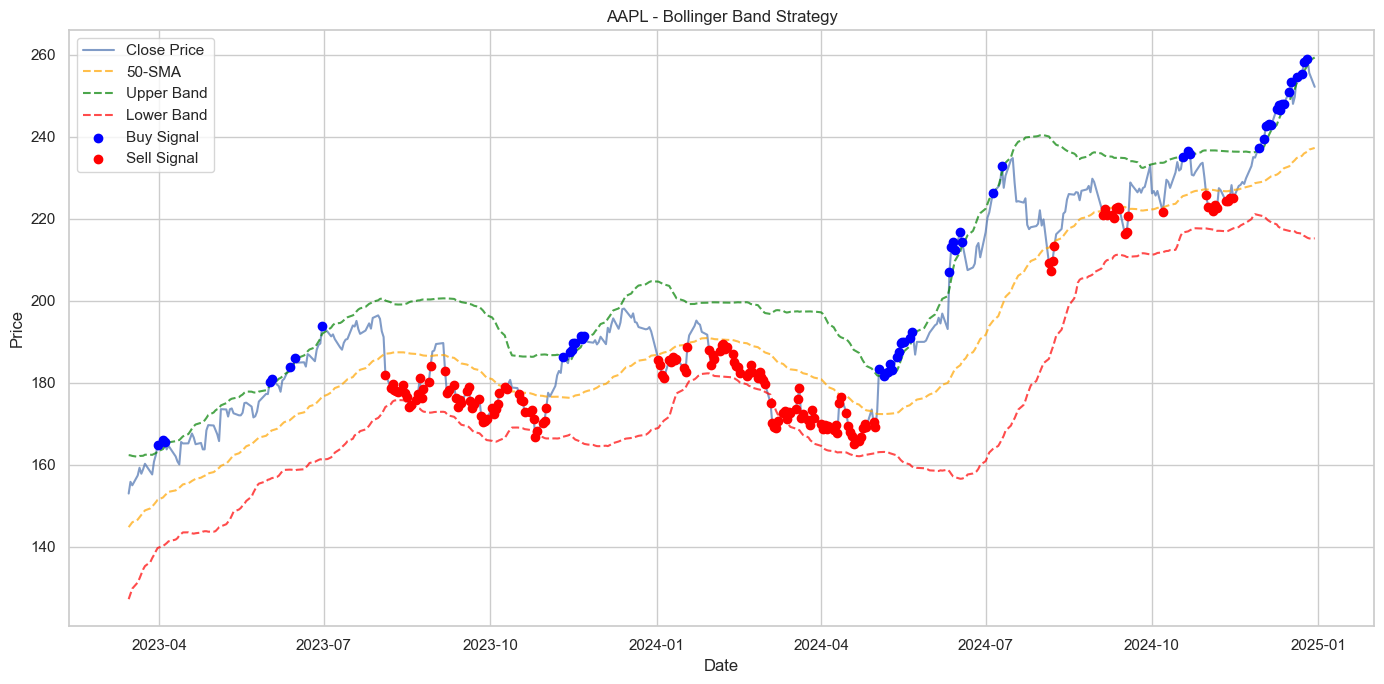

In [128]:
# Required Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for clean output in Jupyter
warnings.filterwarnings('ignore')

# Fetch Stock Data
def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetch stock data for the given ticker and date range.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)
    return stock_data



def generate_trade_signals(data):
    """
    Generate entry and exit signals based on the Bollinger Band strategy.
    """
    # Drop rows with NaN values caused by rolling calculations
    data = data.dropna(subset=['Close', '50_SMA', 'Upper_Band', 'Lower_Band'])

    # Entry: Close price goes above the upper band
    data['Entry_Signal'] = data['Close'] > data['Upper_Band']
    
    # Exit: Close price falls below the 50-day SMA
    data['Exit_Signal'] = data['Close'] < data['50_SMA']
    
    return data


# Plot Bollinger Bands and Trading Signals
def plot_trading_signals(data, ticker):
    """
    Plot Bollinger Bands and trading signals.
    """
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price and Bollinger Bands
    plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.7)
    plt.plot(data['Date'], data['50_SMA'], label='50-SMA', linestyle='--', color='orange', alpha=0.7)
    plt.plot(data['Date'], data['Upper_Band'], label='Upper Band', linestyle='--', color='green', alpha=0.7)
    plt.plot(data['Date'], data['Lower_Band'], label='Lower Band', linestyle='--', color='red', alpha=0.7)
    
    # Highlight Entry and Exit Signals
    plt.scatter(data[data['Entry_Signal']]['Date'], 
                data[data['Entry_Signal']]['Close'], 
                color='blue', label='Buy Signal', zorder=5)
    plt.scatter(data[data['Exit_Signal']]['Date'], 
                data[data['Exit_Signal']]['Close'], 
                color='red', label='Sell Signal', zorder=5)

    plt.title(f"{ticker} - Bollinger Band Strategy")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution Block
# Define the stock ticker and time period
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-12-31'


# Fetch stock data
stock_data = fetch_stock_data(ticker, start_date, end_date)

# Flatten MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [f"{col[0]}" for col in stock_data.columns]

# Reset the index for consistency
stock_data.reset_index(inplace=True)

stock_data['50_SMA'] = stock_data['Close'].rolling(50).mean()
stock_data['Std_Dev'] = stock_data['Close'].rolling(50).std()
stock_data['Upper_Band'] = stock_data['50_SMA'] + (stock_data['Std_Dev'] * 2)
stock_data['Lower_Band'] = stock_data['50_SMA'] - (stock_data['Std_Dev'] * 2)


# Drop NaN rows after Bollinger Band calculations
stock_data = stock_data.dropna(subset=['50_SMA', 'Upper_Band', 'Lower_Band'])

# Debug: Ensure no NaN values remain
print("Remaining rows after dropna:", stock_data.isnull().sum())

# Generate trading signals
stock_data = generate_trade_signals(stock_data)

# Display signals
print("Trade Signals:")
print(stock_data[stock_data['Entry_Signal'] | stock_data['Exit_Signal']][['Date', 'Close', 'Entry_Signal', 'Exit_Signal']])

# Plot the results
plot_trading_signals(stock_data, ticker)
